<a href="https://colab.research.google.com/github/ebi19912/AI/blob/main/VisDrone_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d banuprasadb/visdrone-dataset -p /content/
!unzip visdrone-dataset.zip -d visdrone-dataset

Streaming output truncated to the last 5000 lines.
  inflating: visdrone-dataset/VisDrone_Dataset/VisDrone2019-DET-train/labels/9999951_00000_d_0000236.txt  
  inflating: visdrone-dataset/VisDrone_Dataset/VisDrone2019-DET-train/labels/9999951_00000_d_0000237.txt  
  inflating: visdrone-dataset/VisDrone_Dataset/VisDrone2019-DET-train/labels/9999951_00000_d_0000238.txt  
  inflating: visdrone-dataset/VisDrone_Dataset/VisDrone2019-DET-train/labels/9999951_00000_d_0000239.txt  
  inflating: visdrone-dataset/VisDrone_Dataset/VisDrone2019-DET-train/labels/9999951_00000_d_0000240.txt  
  inflating: visdrone-dataset/VisDrone_Dataset/VisDrone2019-DET-train/labels/9999951_00000_d_0000241.txt  
  inflating: visdrone-dataset/VisDrone_Dataset/VisDrone2019-DET-train/labels/9999951_00000_d_0000242.txt  
  inflating: visdrone-dataset/VisDrone_Dataset/VisDrone2019-DET-train/labels/9999951_00000_d_0000243.txt  
  inflating: visdrone-dataset/VisDrone_Dataset/VisDrone2019-DET-train/labels/9999951_00000_d_

In [2]:
import os
import shutil

source_dir = "/content/visdrone-dataset/VisDrone_Dataset"
destination_base_dir = "/content/processed_visdrone_dataset"

destination_dir_train_images = os.path.join(destination_base_dir, "train/images")
destination_dir_train_labels = os.path.join(destination_base_dir, "train/labels")
destination_dir_val_images = os.path.join(destination_base_dir, "val/images")
destination_dir_val_labels = os.path.join(destination_base_dir, "val/labels")


# Source directories for original images and labels
source_images_train = os.path.join(source_dir, "VisDrone2019-DET-train/images")
source_labels_train = os.path.join(source_dir, "VisDrone2019-DET-train/labels")
source_images_val = os.path.join(source_dir, "VisDrone2019-DET-val/images")
source_labels_val = os.path.join(source_dir, "VisDrone2019-DET-val/labels")

# Create necessary directories if they don't exist
os.makedirs(destination_dir_train_images, exist_ok=True)
os.makedirs(destination_dir_train_labels, exist_ok=True)
os.makedirs(destination_dir_val_images, exist_ok=True)
os.makedirs(destination_dir_val_labels, exist_ok=True)


# Function to copy files for a given split
def copy_files(source_img_dir, source_lbl_dir, dest_img_dir, dest_lbl_dir):
    # Iterate through files in the source image directory
    for filename in os.listdir(source_img_dir):
        if filename.endswith(".jpg"):
            # Get the base name without extension
            base_name, _ = os.path.splitext(filename)

            # Define source and destination paths for image
            source_image_path = os.path.join(source_img_dir, filename)
            destination_image_path = os.path.join(dest_img_dir, filename)

            # Define source and destination paths for label file
            label_filename = base_name + ".txt"
            source_label_path = os.path.join(source_lbl_dir, label_filename)
            destination_label_path = os.path.join(dest_lbl_dir, label_filename)

            # Copy images
            if os.path.exists(source_image_path):
                shutil.copy2(source_image_path, destination_image_path)

            # Copy corresponding label files
            if os.path.exists(source_label_path):
                shutil.copy2(source_label_path, destination_label_path)
            else:
                # Optional: Handle cases where a label file might not exist for an image
                print(f"Label file not found for {filename}")


# Copy files for the training set
print("Copying training files...")
copy_files(source_images_train, source_labels_train, destination_dir_train_images, destination_dir_train_labels)

# Copy files for the validation set
print("Copying validation files...")
copy_files(source_images_val, source_labels_val, destination_dir_val_images, destination_dir_val_labels)

print("File copying complete.")

Copying training files...
Copying validation files...
File copying complete.


In [3]:
import os

# Check the number of images in train and validation directories
print("Number of training images:", len(os.listdir(destination_dir_train_images)))
print("Number of validation images:", len(os.listdir(destination_dir_val_images)))

print("Number of training labels:", len(os.listdir(destination_dir_train_labels)))
print("Number of validation labels:", len(os.listdir(destination_dir_val_labels)))

Number of training images: 6471
Number of validation images: 548
Number of training labels: 6471
Number of validation labels: 548


In [4]:
yaml_filename='/content/visdrone-dataset/VisDrone_Dataset/visdrone.yaml'

In [5]:

# Correct the test path in the yaml file
test_images_path = "/content/visdrone-dataset/VisDrone_Dataset/VisDrone2019-DET-test-dev/images"
test_labels_path = "/content/visdrone-dataset/VisDrone_Dataset/VisDrone2019-DET-test-dev/labels"

with open(yaml_filename, 'r') as file:
    lines = file.readlines()

with open(yaml_filename, 'w') as file:
    for line in lines:
        if line.strip().startswith('test:'):
            file.write(f"test: {test_images_path}\n")
        elif line.strip().startswith('val:'):
            file.write(f"val: {destination_dir_val_images}\n")
        elif line.strip().startswith('train:'):
            file.write(f"train: {destination_dir_train_images}\n")
        elif line.strip().startswith('test_labels:'):
             file.write(f"test_labels: {test_labels_path}\n")
        else:
            file.write(line)

print(f"Updated '{yaml_filename}' with correct test paths.")

# Optional: Print the updated YAML content to verify
with open(yaml_filename, 'r') as file:
   print(file.read())

Updated '/content/visdrone-dataset/VisDrone_Dataset/visdrone.yaml' with correct test paths.
# VisDrone Dataset Configuration
path: ./VisDrone_Dataset
train: /content/processed_visdrone_dataset/train/images
val: /content/processed_visdrone_dataset/val/images
test: /content/visdrone-dataset/VisDrone_Dataset/VisDrone2019-DET-test-dev/images

#number of classes
nc: 10

# Class names
names:
  0: pedestrian
  1: people
  2: bicycle
  3: car
  4: van
  5: truck
  6: tricycle
  7: awning-tricycle
  8: bus
  9: motor



In [6]:
!pip install --upgrade sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 49.5 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cud

In [7]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 124.0 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found exis

In [8]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

results = model.train(data=yaml_filename, epochs=100, imgsz=500)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 73.7MB/s]


Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/visdrone-dataset/VisDrone_Dataset/visdrone.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=500, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspect

100%|██████████| 755k/755k [00:00<00:00, 14.1MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Model summary: 129 layers, 3,012,798 parameters, 3,012,782 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 64.7MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[500] must be multiple of max stride 32, updating to [512]
train: Fast image access ✅ (ping: 0.0±0.1 ms, read: 3363.8±1131.5 MB/s, size: 261.9 KB)


train: Scanning /content/processed_visdrone_dataset/train/labels... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:04<00:00, 1322.27it/s]

train: /content/processed_visdrone_dataset/train/images/0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: /content/processed_visdrone_dataset/train/images/0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: /content/processed_visdrone_dataset/train/images/9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: /content/processed_visdrone_dataset/train/images/9999987_00000_d_0000049.jpg: 1 duplicate labels removed


train: New cache created: /content/processed_visdrone_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1044.9±621.2 MB/s, size: 131.6 KB)


val: Scanning /content/processed_visdrone_dataset/val/labels... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<00:00, 886.47it/s]

val: New cache created: /content/processed_visdrone_dataset/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.41G      1.954      2.601      1.063        630        512: 100%|██████████| 405/405 [00:41<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]


                   all        548      38759      0.431      0.121     0.0882     0.0456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.42G      1.847      1.695      1.011        719        512: 100%|██████████| 405/405 [00:36<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.93it/s]

                   all        548      38759      0.219      0.151      0.111     0.0597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.06G      1.881      1.616      1.005        384        512: 100%|██████████| 405/405 [00:36<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.98it/s]

                   all        548      38759      0.207      0.184      0.137     0.0721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.73G       1.85      1.558     0.9971        696        512: 100%|██████████| 405/405 [00:35<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.32it/s]

                   all        548      38759      0.205      0.168      0.136     0.0715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.73G      1.804      1.495     0.9857        365        512: 100%|██████████| 405/405 [00:36<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.29it/s]

                   all        548      38759      0.248      0.183      0.151     0.0799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.76G      1.753      1.432     0.9737        392        512: 100%|██████████| 405/405 [00:35<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.48it/s]

                   all        548      38759      0.274      0.189      0.162     0.0899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.77G      1.734      1.401     0.9678        510        512: 100%|██████████| 405/405 [00:35<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.57it/s]

                   all        548      38759      0.276      0.207      0.181     0.0962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.72G      1.702      1.363     0.9638        510        512: 100%|██████████| 405/405 [00:35<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.71it/s]

                   all        548      38759      0.279        0.2      0.173     0.0917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.72G       1.68      1.338     0.9582        411        512: 100%|██████████| 405/405 [00:35<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.54it/s]

                   all        548      38759      0.275       0.21      0.181     0.0963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.74G      1.676      1.315     0.9573        497        512: 100%|██████████| 405/405 [00:36<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.70it/s]

                   all        548      38759      0.304      0.222      0.199      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.75G      1.639      1.279     0.9489        530        512: 100%|██████████| 405/405 [00:35<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.67it/s]

                   all        548      38759      0.304      0.224      0.202       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.76G      1.639      1.274     0.9484        432        512: 100%|██████████| 405/405 [00:35<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.63it/s]

                   all        548      38759      0.303      0.222      0.203      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.76G      1.641       1.26      0.947        668        512: 100%|██████████| 405/405 [00:36<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.68it/s]

                   all        548      38759      0.317      0.227      0.209      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.79G      1.623      1.249     0.9445        704        512: 100%|██████████| 405/405 [00:35<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.76it/s]

                   all        548      38759      0.327      0.223      0.208      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.84G      1.614      1.231     0.9411        492        512: 100%|██████████| 405/405 [00:35<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.70it/s]

                   all        548      38759      0.326      0.237      0.222       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.85G      1.594      1.219     0.9392        605        512: 100%|██████████| 405/405 [00:35<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.76it/s]

                   all        548      38759      0.322      0.233      0.217      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.85G      1.609      1.225     0.9406        645        512: 100%|██████████| 405/405 [00:35<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.80it/s]

                   all        548      38759      0.334       0.23      0.219       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.87G      1.586      1.199     0.9361        737        512: 100%|██████████| 405/405 [00:35<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.75it/s]

                   all        548      38759      0.322      0.235       0.22      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.88G      1.577      1.196     0.9346        266        512: 100%|██████████| 405/405 [00:35<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.56it/s]

                   all        548      38759      0.322      0.232       0.22      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       7.9G      1.573      1.187     0.9319        581        512: 100%|██████████| 405/405 [00:35<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.73it/s]

                   all        548      38759       0.34      0.248      0.223      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       7.9G      1.574      1.182     0.9343        551        512: 100%|██████████| 405/405 [00:35<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.71it/s]

                   all        548      38759      0.343      0.243      0.229      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.92G      1.581      1.185     0.9331       1013        512: 100%|██████████| 405/405 [00:35<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.87it/s]

                   all        548      38759      0.341       0.24      0.232      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.93G      1.566       1.17     0.9292        373        512: 100%|██████████| 405/405 [00:35<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.88it/s]

                   all        548      38759      0.355      0.243      0.236      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.94G      1.543      1.158     0.9284        654        512: 100%|██████████| 405/405 [00:35<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.79it/s]

                   all        548      38759      0.368      0.246      0.237       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.94G      1.546      1.153     0.9254        489        512: 100%|██████████| 405/405 [00:35<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.79it/s]

                   all        548      38759      0.363      0.249      0.237      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.96G      1.537      1.145      0.924        614        512: 100%|██████████| 405/405 [00:35<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.78it/s]

                   all        548      38759      0.368       0.25      0.242      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.97G       1.54      1.145     0.9239        504        512: 100%|██████████| 405/405 [00:35<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.77it/s]

                   all        548      38759      0.357      0.247      0.238      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.99G      1.538      1.144     0.9254        757        512: 100%|██████████| 405/405 [00:35<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.87it/s]

                   all        548      38759      0.361      0.246      0.236       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.99G      1.532      1.133     0.9229        752        512: 100%|██████████| 405/405 [00:35<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.93it/s]

                   all        548      38759      0.357      0.253      0.243      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.01G      1.537      1.133     0.9217        536        512: 100%|██████████| 405/405 [00:35<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.72it/s]

                   all        548      38759      0.349      0.259      0.245      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.02G      1.527      1.123     0.9208        568        512: 100%|██████████| 405/405 [00:35<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.79it/s]

                   all        548      38759      0.356      0.258      0.246      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.03G      1.525       1.12     0.9209        612        512: 100%|██████████| 405/405 [00:35<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.78it/s]

                   all        548      38759      0.356      0.257      0.245      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.03G      1.515       1.11     0.9206        868        512: 100%|██████████| 405/405 [00:35<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.80it/s]

                   all        548      38759      0.362       0.26      0.253       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.05G      1.522      1.114     0.9197        812        512: 100%|██████████| 405/405 [00:35<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.86it/s]

                   all        548      38759      0.367      0.258      0.249      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.07G      1.502      1.097     0.9173        784        512: 100%|██████████| 405/405 [00:35<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.82it/s]

                   all        548      38759      0.365       0.26      0.251      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.08G      1.508      1.104     0.9177        507        512: 100%|██████████| 405/405 [00:35<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.74it/s]

                   all        548      38759      0.357      0.263      0.248      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.08G      1.503      1.099     0.9164        662        512: 100%|██████████| 405/405 [00:35<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.85it/s]

                   all        548      38759      0.375      0.257      0.252      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       8.1G      1.512      1.099     0.9163        426        512: 100%|██████████| 405/405 [00:35<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.84it/s]

                   all        548      38759      0.361      0.267      0.256      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.11G      1.506      1.101     0.9165        604        512: 100%|██████████| 405/405 [00:35<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.84it/s]

                   all        548      38759      0.381      0.261      0.254      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.12G      1.496      1.092     0.9139        545        512: 100%|██████████| 405/405 [00:35<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.84it/s]

                   all        548      38759      0.368      0.264      0.257      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.12G      1.498      1.091     0.9142        544        512: 100%|██████████| 405/405 [00:35<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.93it/s]

                   all        548      38759      0.367      0.267      0.254      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.15G      1.488      1.081     0.9153        471        512: 100%|██████████| 405/405 [00:35<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.86it/s]

                   all        548      38759      0.372      0.268      0.257      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.16G      1.484      1.078     0.9125        663        512: 100%|██████████| 405/405 [00:35<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.88it/s]

                   all        548      38759      0.367       0.27      0.262      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.17G      1.495      1.079     0.9127        493        512: 100%|██████████| 405/405 [00:35<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.79it/s]

                   all        548      38759      0.365      0.264      0.257      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.17G      1.487      1.077     0.9125        420        512: 100%|██████████| 405/405 [00:35<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.82it/s]

                   all        548      38759      0.374      0.266      0.258      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.19G      1.485      1.075     0.9124        640        512: 100%|██████████| 405/405 [00:35<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.86it/s]

                   all        548      38759      0.379      0.266       0.26      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       8.2G      1.474      1.064     0.9093        435        512: 100%|██████████| 405/405 [00:35<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.88it/s]

                   all        548      38759      0.374      0.271       0.26      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.21G      1.473      1.065     0.9105        503        512: 100%|██████████| 405/405 [00:35<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.87it/s]

                   all        548      38759      0.373      0.268      0.258      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.21G       1.47      1.062     0.9086        538        512: 100%|██████████| 405/405 [00:35<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.79it/s]

                   all        548      38759       0.37      0.273      0.264      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.24G      1.471      1.056     0.9077        368        512: 100%|██████████| 405/405 [00:34<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.97it/s]

                   all        548      38759      0.378      0.272      0.264      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.25G      1.462      1.053     0.9079        606        512: 100%|██████████| 405/405 [00:35<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.90it/s]

                   all        548      38759       0.38      0.279      0.268      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.26G      1.459      1.049     0.9061        401        512: 100%|██████████| 405/405 [00:35<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.86it/s]

                   all        548      38759      0.379      0.273      0.265      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.26G      1.466      1.052     0.9068        549        512: 100%|██████████| 405/405 [00:35<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.96it/s]

                   all        548      38759      0.384      0.272      0.266      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.28G      1.466      1.049      0.907        684        512: 100%|██████████| 405/405 [00:35<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.92it/s]

                   all        548      38759      0.373      0.278      0.267      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.29G      1.452      1.039     0.9064        973        512: 100%|██████████| 405/405 [00:35<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.79it/s]

                   all        548      38759      0.386      0.275      0.267       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.31G      1.454      1.038     0.9058        465        512: 100%|██████████| 405/405 [00:35<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.87it/s]

                   all        548      38759      0.393      0.275      0.267      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.31G      1.448      1.036     0.9038        392        512: 100%|██████████| 405/405 [00:35<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.84it/s]

                   all        548      38759      0.384      0.271      0.267      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.33G      1.439      1.028     0.9037        554        512: 100%|██████████| 405/405 [00:35<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  6.00it/s]

                   all        548      38759      0.394      0.277      0.272      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.34G      1.447      1.034     0.9054        472        512: 100%|██████████| 405/405 [00:35<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.94it/s]

                   all        548      38759      0.385      0.279      0.273      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.35G      1.451      1.031     0.9034        717        512: 100%|██████████| 405/405 [00:35<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.74it/s]

                   all        548      38759      0.393      0.274       0.27      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.35G      1.445      1.028     0.9022        333        512: 100%|██████████| 405/405 [00:35<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.94it/s]

                   all        548      38759      0.378      0.279      0.271      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.38G      1.443      1.023     0.9033        534        512: 100%|██████████| 405/405 [00:35<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.92it/s]

                   all        548      38759      0.392      0.278      0.271      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.38G      1.446      1.026     0.9035        763        512: 100%|██████████| 405/405 [00:35<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.97it/s]

                   all        548      38759      0.386      0.277      0.272      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       8.4G      1.438      1.025     0.9018        403        512: 100%|██████████| 405/405 [00:35<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.90it/s]

                   all        548      38759      0.387      0.275       0.27      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       8.4G      1.439      1.021     0.9013        662        512: 100%|██████████| 405/405 [00:35<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.88it/s]

                   all        548      38759      0.394      0.277      0.272      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.42G      1.437      1.018     0.8995        765        512: 100%|██████████| 405/405 [00:35<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.98it/s]

                   all        548      38759      0.386       0.28      0.271      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.43G      1.432      1.011     0.8998        651        512: 100%|██████████| 405/405 [00:35<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.96it/s]

                   all        548      38759      0.387      0.284      0.273      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.44G      1.428      1.007     0.9008        551        512: 100%|██████████| 405/405 [00:35<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.77it/s]

                   all        548      38759      0.392      0.283      0.277      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.44G      1.424      1.007     0.9007        401        512: 100%|██████████| 405/405 [00:35<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.95it/s]

                   all        548      38759      0.378      0.286      0.274      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.47G      1.434      1.016     0.9017        590        512: 100%|██████████| 405/405 [00:35<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.95it/s]

                   all        548      38759      0.385      0.283      0.274      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.48G      1.427      1.006     0.9001        481        512: 100%|██████████| 405/405 [00:35<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.91it/s]

                   all        548      38759      0.386      0.283      0.276      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.49G      1.422      1.002     0.8995        575        512: 100%|██████████| 405/405 [00:35<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.82it/s]

                   all        548      38759      0.399      0.284      0.279      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.49G      1.415     0.9949     0.8973        731        512: 100%|██████████| 405/405 [00:35<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.86it/s]

                   all        548      38759      0.393      0.281      0.275      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.51G      1.419     0.9971      0.899        389        512: 100%|██████████| 405/405 [00:35<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.95it/s]

                   all        548      38759      0.392      0.285      0.278      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.52G      1.403     0.9867     0.8975        507        512: 100%|██████████| 405/405 [00:35<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.80it/s]

                   all        548      38759      0.401      0.283      0.278      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.53G      1.416     0.9938     0.8982        527        512: 100%|██████████| 405/405 [00:35<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.91it/s]

                   all        548      38759      0.405      0.279      0.278      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.54G      1.411     0.9899     0.8967        467        512: 100%|██████████| 405/405 [00:35<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.85it/s]

                   all        548      38759      0.396      0.284      0.278      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.56G      1.415     0.9896      0.897        676        512: 100%|██████████| 405/405 [00:35<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.95it/s]

                   all        548      38759      0.395      0.287      0.279      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.63G      1.409     0.9842     0.8961        847        512: 100%|██████████| 405/405 [00:35<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.88it/s]

                   all        548      38759      0.394      0.286      0.278      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.64G      1.402      0.978      0.895        802        512: 100%|██████████| 405/405 [00:35<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.89it/s]

                   all        548      38759      0.394      0.287      0.278      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.64G      1.404     0.9799     0.8945        428        512: 100%|██████████| 405/405 [00:35<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.87it/s]

                   all        548      38759      0.389      0.287      0.278      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.67G      1.402     0.9756     0.8963        437        512: 100%|██████████| 405/405 [00:35<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.93it/s]

                   all        548      38759      0.391      0.289      0.278      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.68G      1.403     0.9777     0.8953        690        512: 100%|██████████| 405/405 [00:35<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.87it/s]

                   all        548      38759      0.391      0.287      0.279      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.69G        1.4     0.9741     0.8933        509        512: 100%|██████████| 405/405 [00:35<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.88it/s]

                   all        548      38759       0.39      0.291       0.28      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.69G      1.389     0.9688     0.8936        529        512: 100%|██████████| 405/405 [00:35<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.79it/s]

                   all        548      38759      0.395      0.286      0.279      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.71G      1.398     0.9695     0.8927        566        512: 100%|██████████| 405/405 [00:35<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.90it/s]

                   all        548      38759      0.392      0.289      0.279      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.72G      1.395     0.9685     0.8949        436        512: 100%|██████████| 405/405 [00:35<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  6.01it/s]

                   all        548      38759      0.396      0.288       0.28      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.74G      1.387     0.9626     0.8909        471        512: 100%|██████████| 405/405 [00:35<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.92it/s]

                   all        548      38759      0.399      0.288      0.281      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.74G      1.396     0.9644     0.8948        486        512: 100%|██████████| 405/405 [00:35<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.79it/s]

                   all        548      38759      0.396      0.291      0.281      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.76G      1.391     0.9667     0.8929        497        512: 100%|██████████| 405/405 [00:35<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.87it/s]

                   all        548      38759      0.392      0.292      0.281      0.159


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.77G      1.352     0.9386     0.8918        416        512: 100%|██████████| 405/405 [00:36<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.56it/s]

                   all        548      38759      0.399      0.287       0.28      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.78G      1.343     0.9218     0.8892        281        512: 100%|██████████| 405/405 [00:34<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.75it/s]

                   all        548      38759      0.395      0.287      0.279      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.78G      1.334     0.9155     0.8885         86        512: 100%|██████████| 405/405 [00:35<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.82it/s]

                   all        548      38759      0.387       0.29      0.278      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       9.8G      1.332     0.9084     0.8885        296        512: 100%|██████████| 405/405 [00:34<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.75it/s]

                   all        548      38759      0.392      0.288      0.279      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.82G      1.328     0.9043     0.8864        292        512: 100%|██████████| 405/405 [00:34<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.79it/s]

                   all        548      38759      0.396      0.288      0.279      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.83G      1.326     0.9033     0.8858        195        512: 100%|██████████| 405/405 [00:34<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.77it/s]

                   all        548      38759      0.395      0.287      0.279      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.83G      1.325     0.9018      0.886        294        512: 100%|██████████| 405/405 [00:34<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.91it/s]

                   all        548      38759      0.397      0.288       0.28      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.85G      1.325     0.8992      0.885        332        512: 100%|██████████| 405/405 [00:34<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.76it/s]

                   all        548      38759      0.394      0.287      0.279      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.86G      1.323      0.898     0.8857        221        512: 100%|██████████| 405/405 [00:34<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.85it/s]

                   all        548      38759      0.391      0.289       0.28      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.87G      1.315      0.893     0.8842        308        512: 100%|██████████| 405/405 [00:34<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.77it/s]

                   all        548      38759      0.395      0.287       0.28      0.157



100 epochs completed in 1.080 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.81it/s]


                   all        548      38759      0.399      0.288      0.281      0.159
            pedestrian        520       8844      0.404      0.278      0.276      0.111
                people        482       5125      0.477      0.174      0.217     0.0708
               bicycle        364       1287      0.194     0.0738     0.0493     0.0168
                   car        515      14064      0.603      0.704      0.702      0.466
                   van        421       1975      0.412      0.329      0.317      0.211
                 truck        266        750      0.405      0.265       0.26      0.162
              tricycle        337       1045      0.328      0.207      0.188     0.0989
       awning-tricycle        220        532      0.244      0.132     0.0966     0.0591
                   bus        131        251      0.519      0.422      0.423      0.285
                 motor        485       4886      0.405        0.3      0.284      0.111
Speed: 0.1ms preproce

In [9]:
from IPython.display import Image, display
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import Image, display
from ultralytics import YOLO

Saving 1.webp to 1.webp

image 1/1 /content/1.webp: 288x512 62 pedestrians, 1 bicycle, 6 cars, 1 van, 2 motors, 45.9ms
Speed: 2.3ms preprocess, 45.9ms inference, 2.2ms postprocess per image at shape (1, 3, 288, 512)


array([[[ 54,  44,  41],
        [ 85,  87,  33],
        [183, 223,   0],
        ...,
        [255,  42,   4],
        [255,  42,   4],
        [255,  42,   4]],

       [[ 55,  45,  42],
        [ 84,  83,  37],
        [183, 223,   0],
        ...,
        [255,  42,   4],
        [255,  42,   4],
        [255,  42,   4]],

       [[ 59,  49,  46],
        [ 87,  88,  39],
        [183, 223,   0],
        ...,
        [255,  42,   4],
        [255,  42,   4],
        [255,  42,   4]],

       ...,

       [[255,  42,   4],
        [255,  42,   4],
        [ 85,  26,  18],
        ...,
        [ 87,  74,  67],
        [ 87,  74,  67],
        [ 87,  74,  67]],

       [[255,  42,   4],
        [255,  42,   4],
        [126,  33,  18],
        ...,
        [ 87,  74,  67],
        [ 87,  74,  67],
        [ 87,  74,  67]],

       [[255,  42,   4],
        [255,  42,   4],
        [255,  42,   4],
        ...,
        [ 87,  74,  67],
        [ 87,  74,  67],
        [ 87,  74,  67]]], dtype=uint8)
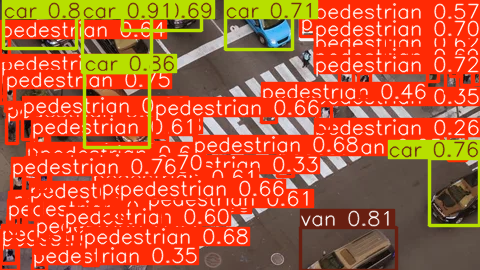

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 4., 3., 0., 0., 0., 3., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 9., 0., 0., 0., 0., 9., 2., 0., 0.], device='cuda:0')
conf: tensor([0.9101, 0.8638, 0.8134, 0.8129, 0.7647, 0.7573, 0.7463, 0.7237, 0.7105, 0.6994, 0.6987, 0.6936, 0.6867, 0.6835, 0.6769, 0.6607, 0.6604, 0.6433, 0.6278, 0.6256, 0.6197, 0.6144, 0.6141, 0.6134, 0.6103, 0.6073, 0.6011, 0.6001, 0.5878, 0.5749, 0.5726, 0.5680, 0.5612, 0.5492, 0.5148, 0.5140, 0.4901, 0.4894, 0.4894,
        0.4773, 0.4661, 0.4658, 0.4632, 0.4625, 0.4484, 0.4453, 0.4437, 0.4103, 0.3866, 0.3860, 0.3849, 0.3831, 0.3723, 0.3618, 0.3542, 0.3483, 0.3473, 0.3418, 0.3385, 0.3379, 0.3281, 0.3260, 0.3252, 0.3150, 0.3020, 0.2916, 0.2834, 0.2789, 0.2777, 0.2770, 0.2583, 0.2510], device='cuda:0')
data: t

In [10]:

model = YOLO('/content/runs/detect/train/weights/best.pt')

uploaded = files.upload()

image_filename = list(uploaded.keys())[0]

results = model(image_filename)

display(results[0].plot())

results[0].boxes

Saving depositphotos_302410084-stock-photo-aerial-road-abstract-top-down.jpg to depositphotos_302410084-stock-photo-aerial-road-abstract-top-down.jpg

image 1/1 /content/depositphotos_302410084-stock-photo-aerial-road-abstract-top-down.jpg: 384x512 2 pedestrians, 40 cars, 3 vans, 2 trucks, 1 bus, 1 motor, 50.6ms
Speed: 2.1ms preprocess, 50.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 512)


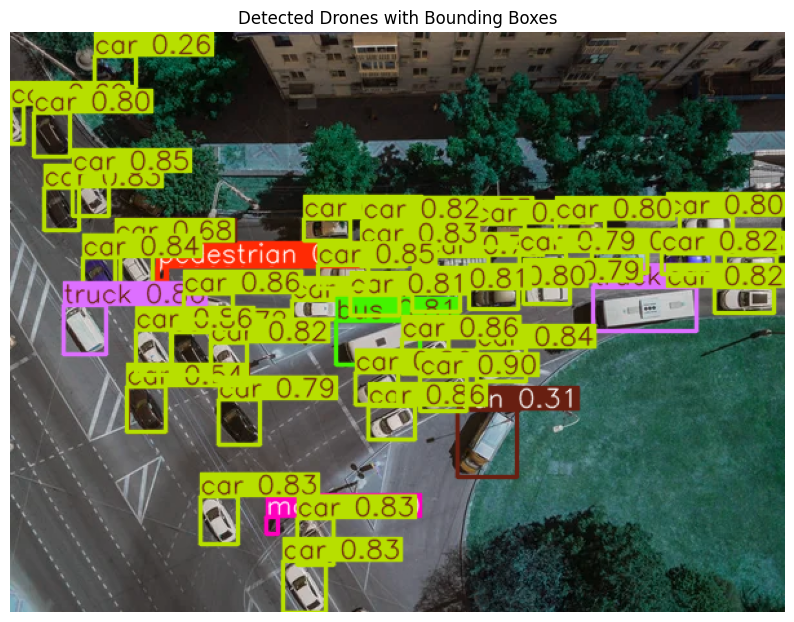

In [11]:


model = YOLO('/content/runs/detect/train/weights/best.pt')

uploaded = files.upload()


image_filename = list(uploaded.keys())[0]

results = model(image_filename)

annotated_frame = results[0].plot()

plt.figure(figsize=(10, 10))
plt.imshow(annotated_frame)
plt.axis('off')
plt.title("Detected Drones with Bounding Boxes")
plt.show()


Saving depositphotos_309050318-stock-photo-drones-eye-view-aerial-city.jpg to depositphotos_309050318-stock-photo-drones-eye-view-aerial-city.jpg

image 1/1 /content/depositphotos_309050318-stock-photo-drones-eye-view-aerial-city.jpg: 288x512 16 cars, 1 van, 2 trucks, 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 512)


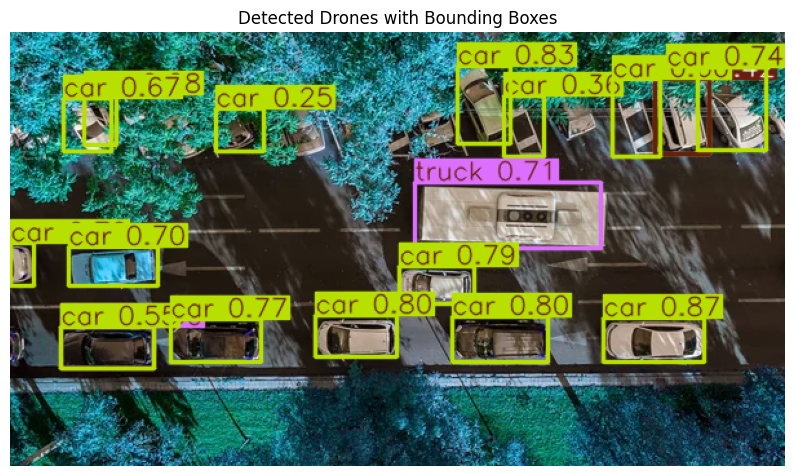

In [14]:

model = YOLO('/content/runs/detect/train/weights/best.pt')

uploaded = files.upload()


image_filename = list(uploaded.keys())[0]

results = model(image_filename)

annotated_frame = results[0].plot()

plt.figure(figsize=(10, 10))
plt.imshow(annotated_frame)
plt.axis('off')
plt.title("Detected Drones with Bounding Boxes")
plt.show()


Saving istockphoto-1487776317-612x612.jpg to istockphoto-1487776317-612x612.jpg

image 1/1 /content/istockphoto-1487776317-612x612.jpg: 352x512 2 pedestrians, 3 cars, 1 truck, 47.2ms
Speed: 1.9ms preprocess, 47.2ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 512)


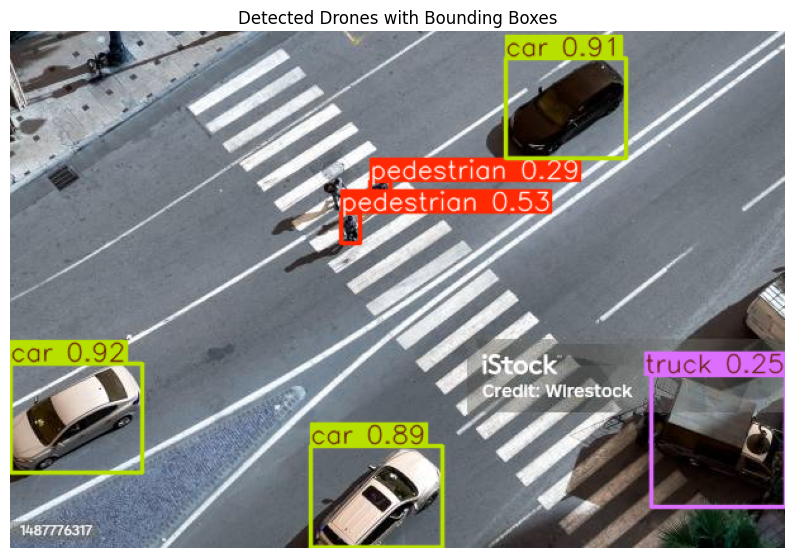

In [16]:

model = YOLO('/content/runs/detect/train/weights/best.pt')

uploaded = files.upload()


image_filename = list(uploaded.keys())[0]

results = model(image_filename)

annotated_frame = results[0].plot()

plt.figure(figsize=(10, 10))
plt.imshow(annotated_frame)
plt.axis('off')
plt.title("Detected Drones with Bounding Boxes")
plt.show()
